# Preprocess and Explore the Data
 - Loading, cleaning, and understanding the data to prepare it for modeling.
- This notebook preprocesses and analyzes financial data for TSLA, BND, and SPY as part of the GMF Investments case study.
- It uses corrected functions to handle data fetching, cleaning, EDA, and risk metrics calculation.
 **Assumptions**:
  - Data is fetched using `yfinance` for the period July 1, 2015, to July 31, 2025.
   - Output directory: 'plots' for visualizations and insights; 'data' for raw CSV files.
  - Risk-free rate: 0.02 (2% annually).
  - Handles multi-level column indices and potential column name mismatches.
   **Output**:
  - CSV files for raw data in 'data' directory. 
   - Results dictionary for further analysis (e.g., forecasting, portfolio optimization).

In [2]:
# dependencies for the script
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src import scrap_preprocess_data

# Define parameters

In [3]:
# Execute the Workflow
# to Run the full preprocessing and analysis pipeline.
# Define parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'
data_dir = 'data'
output_dir = 'plots'
risk_free_rate = 0.02

# Extracting of historical financial data using YFinance

In [4]:
# Fetch data
from src.scrap_preprocess_data import fetch_financial_data
adj_close, volume = fetch_financial_data(tickers, start_date, end_date, data_dir)



Data fetched successfully for 3 tickers.


In [8]:
# display of sample feched data 
print("====================Adj Close :====================")
print(adj_close.head())
print("====================volume data :====================")
print(volume.head())
# Display the first few rows of the fetched data
 


====================Adj Close :====================
                 TSLA        BND         SPY
Date                                        
2015-07-01  17.943333  60.816761  174.917114
2015-07-02  18.667999  60.967079  174.756958
2015-07-06  18.648001  61.177528  174.259598
2015-07-07  17.858667  61.237720  175.355408
2015-07-08  16.997334  61.410633  172.413467
====================volume data :====================
                 TSLA      BND        SPY
Date                                     
2015-07-01   31518000  5399300  135979900
2015-07-02  107458500  1060100  104373700
2015-07-06   61828500  2210700  117975400
2015-07-07   91576500  4183200  173820200
2015-07-08   93316500  1967800  164020100


## loading extracted file  to further preprocessing 

In [6]:
df1=pd.read_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/TSLA_data.csv')
df2=pd.read_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/SPY_data.csv')
df3=pd.read_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/BND_data.csv')
volume=pd.read_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/volume_data.csv')
adj_close=pd.read_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/adj_close_data.csv')


## date adjustments 

In [7]:
# Set 'Date' as index and convert to datetime objects
adj_close['Date'] = pd.to_datetime(adj_close['Date'])
adj_close = adj_close.set_index('Date')

volume['Date'] = pd.to_datetime(volume['Date'])
volume = volume.set_index('Date')

In [3]:

# To display the head of three tsla,spy and band
print('=======The scraped Data of TSLA=======')
print(df1.head())
# shape of the data
print('Shape of TSLA data: ===', df1.shape)
print('=======The scraped Data of SPY=======')
print(df2.head())
print('Shape of SPY data: ===', df2.shape)
print('=======The scraped Data of BND=======')
print(df3.head())
print('Shape of BND data: ==', df3.shape)

=======The scraped Data of TSLA=======
         Date       Open       High        Low      Close     Volume
0  2015-07-01  18.073999  18.174667  17.856667  17.943333   31518000
1  2015-07-02  18.680000  18.830000  18.220667  18.667999  107458500
2  2015-07-06  18.591999  18.779333  18.420000  18.648001   61828500
3  2015-07-07  18.333332  18.346666  17.384666  17.858667   91576500
4  2015-07-08  17.288000  17.386667  16.954000  16.997334   93316500
Shape of TSLA data: === (2535, 6)
=======The scraped Data of SPY=======
         Date        Open        High         Low       Close     Volume
0  2015-07-01  175.110995  175.363889  174.124717  174.917114  135979900
1  2015-07-02  175.397627  175.566219  174.335471  174.756958  104373700
2  2015-07-06  173.458775  175.043557  173.256457  174.259598  117975400
3  2015-07-07  174.461858  175.481849  172.059377  175.355408  173820200
4  2015-07-08  174.006688  174.293296  172.177436  172.413467  164020100
Shape of SPY data: === (2535, 6)
====

# Data Cleaning and understanding

In [14]:
# Data Cleaning and understanding
# Stastical summaries of the data
print("Statistical Summary of TSLA Data:")
print(df1.describe())
print("Statistical Summary of SPY Data:")
print(df2.describe())
print("Statistical Summary of BND Data:")
print(df3.describe())


Statistical Summary of TSLA Data:
              Open         High          Low        Close        Volume
count  2535.000000  2535.000000  2535.000000  2535.000000  2.535000e+03
mean    132.000600   134.960429   128.837831   131.963002  1.141789e+08
std     121.034152   123.783736   117.996631   120.914904  7.332146e+07
min       9.488000    10.331333     9.403333     9.578000  1.062000e+07
25%      18.901000    19.279667    18.575334    18.967667  6.908220e+07
50%      94.400665    97.666664    91.734001    94.571335  9.537450e+07
75%     235.851669   240.881668   232.170006   236.761665  1.322551e+08
max     475.899994   488.540009   457.510010   479.859985  9.140820e+08
Statistical Summary of SPY Data:
              Open         High          Low        Close        Volume
count  2535.000000  2535.000000  2535.000000  2535.000000  2.535000e+03
mean    334.125537   335.981618   332.114635   334.193732  8.503521e+07
std     126.391138   127.053089   125.661287   126.427704  4.428796e+

In [15]:

# to insure all columns are data type 
print("Data Types of TSLA Data:")
print(df1.dtypes)
print("Data Types of SPY Data:")
print(df2.dtypes)
print("Data Types of BND Data:")
print(df3.dtypes)


Data Types of TSLA Data:
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
Data Types of SPY Data:
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
Data Types of BND Data:
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


## Handling missing value if any
 -Define Missing Values Handling Function
 
 -Handle missing values using forward and backward fill.

In [4]:

    # Clean data (print stats)
from src.scrap_preprocess_data import handle_missing_values
df1, df2,df3 = handle_missing_values(df1, df2, df3)



Missing Values Before Handling:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Missing Values After Handling:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


# Exploratory Data Analysis (EDA)

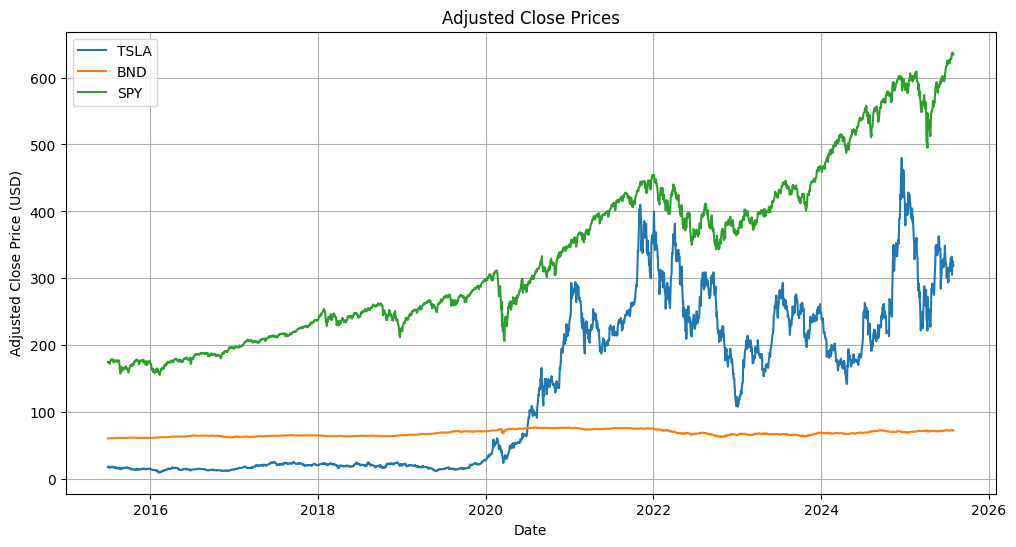

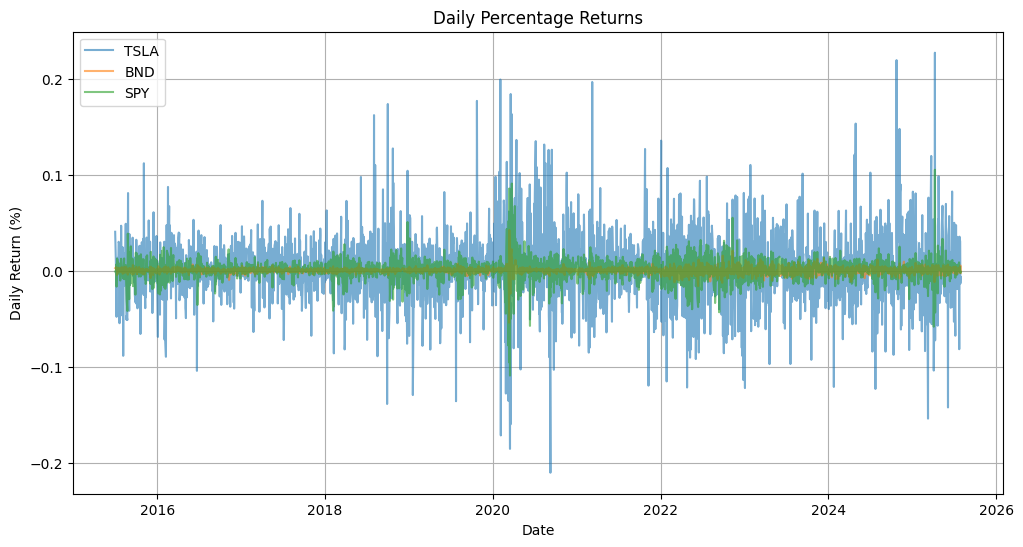

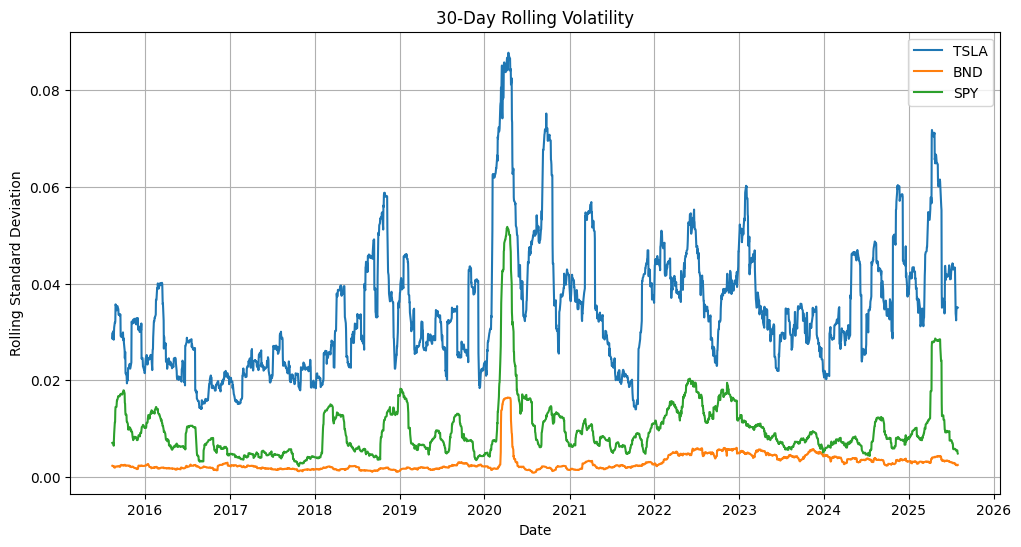

In [8]:

    # EDA visualizations
from src.scrap_preprocess_data import eda_data_analysis
# Perform exploratory data analysis with visualizations.
daily_returns, rolling_mean, rolling_std = eda_data_analysis(adj_close, tickers, output_dir)


In [13]:
# to save the daily returns, rolling mean and rolling std
daily_returns.to_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/daily_returns.csv')
# --- IGNORE ---
# Save the rolling mean and standard deviation to CSV files
rolling_mean.to_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/rolling_mean.csv')
rolling_std.to_csv(os.path.join('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/rolling_std.csv'))


In [14]:

# --- IGNORE ---
# Save the processed data to CSV files
adj_close.to_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/adj_close.csv')
# --- IGNORE ---

# Outlier detection 


Outliers in Daily Returns (Beyond 3 Std Dev):
TSLA: 41 outliers
BND: 26 outliers
SPY: 35 outliers


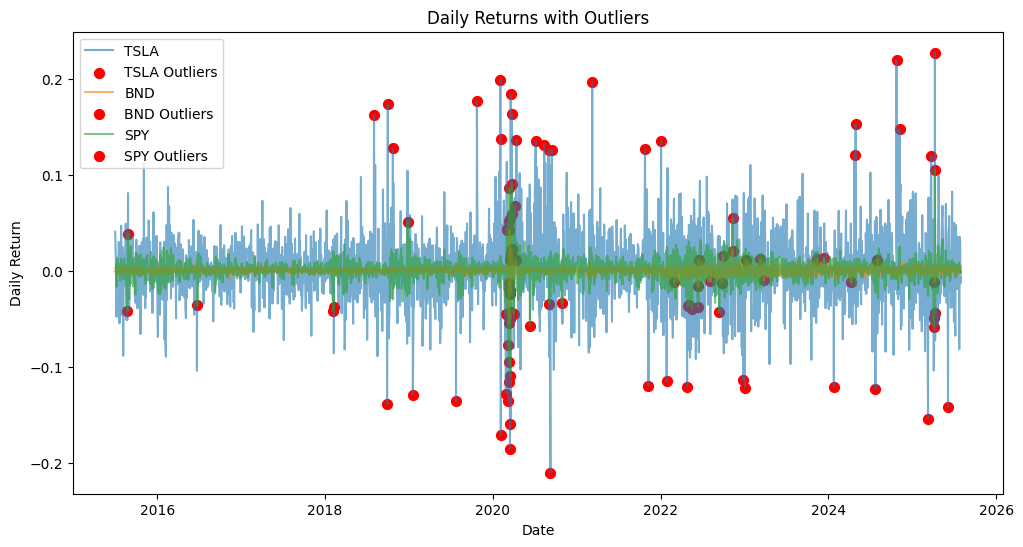

In [9]:

# Outlier detection
from src.scrap_preprocess_data import outlier_detection
outliers, means, stds = outlier_detection(daily_returns, tickers)
#plot the outliers
figure, ax = plt.subplots(figsize=(12, 6))
for ticker in tickers:
    ax.plot(daily_returns.index, daily_returns[ticker], label=ticker, alpha=0.6)
    ax.scatter(outliers[ticker].index, outliers[ticker], color='red', label=f'{ticker} Outliers', s=50)
ax.set_title('Daily Returns with Outliers')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')
ax.legend()
plt.savefig('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/daily_returns_with_outliers.png')
plt.show()

 # Seasonality and Trends
 -- Performing a statistical test (e.g., Augmented Dickey-Fuller test) on the closing prices and daily returns

In [12]:

    # Stationarity test
from src.scrap_preprocess_data import stationarity_test
stationarity_results = stationarity_test(adj_close, daily_returns, tickers)
# to save the stationarity results
stationarity_df = pd.DataFrame(stationarity_results)
stationarity_df.to_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/stationarity_results.csv')



Augmented Dickey-Fuller Test Results:

TSLA - Adjusted Close:
ADF Statistic: -1.4189
p-value: 0.5732
Non-Stationary

TSLA - Daily Returns:
ADF Statistic: -34.6811
p-value: 0.0000
Stationary

BND - Adjusted Close:
ADF Statistic: -1.5363
p-value: 0.5155
Non-Stationary

BND - Daily Returns:
ADF Statistic: -9.8898
p-value: 0.0000
Stationary

SPY - Adjusted Close:
ADF Statistic: 0.6908
p-value: 0.9897
Non-Stationary

SPY - Daily Returns:
ADF Statistic: -16.2644
p-value: 0.0000
Stationary



95% Value at Risk (Daily Returns):
TSLA: -0.0547 (A daily loss exceeding this with 5% probability)
BND: -0.0049 (A daily loss exceeding this with 5% probability)
SPY: -0.0172 (A daily loss exceeding this with 5% probability)

Sharpe Ratio (Annualized):
TSLA: 0.7446
BND: -0.0073
SPY: 0.6844


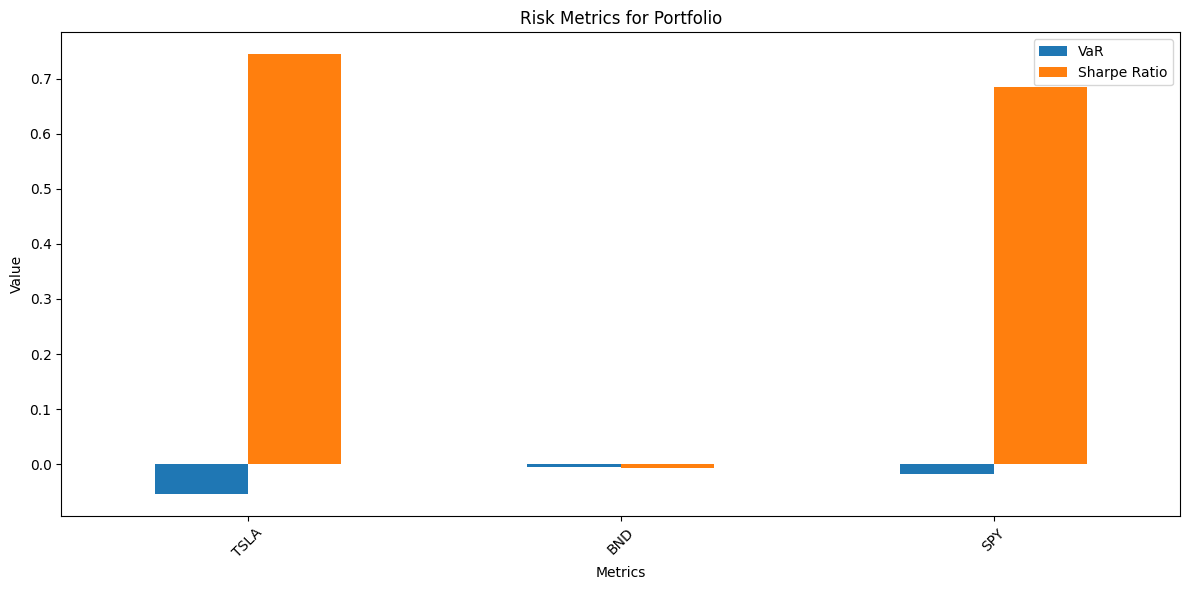

In [10]:

    # Risk metrics
from src.scrap_preprocess_data import risk_metrics
# Calculate risk metrics for the portfolio.
risk_metrics_df = risk_metrics(daily_returns, tickers, risk_free_rate)
#to save the risk metrics
risk_metrics_df.to_csv('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/risk_metrics.csv')
plt.figure(figsize=(12, 6))
risk_metrics_df.plot(kind='bar', ax=plt.gca())
plt.title('Risk Metrics for Portfolio')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/output/risk_metrics.png')
plt.show()

In [13]:

    # Generate insights and compile results
from src.scrap_preprocess_data import insights_and_documentation    
results = insights_and_documentation(adj_close, daily_returns, rolling_mean, rolling_std, stationarity_results, outliers, risk_metrics_df, output_dir, tickers)
 # Print sample results
print("\nSample Insights:")
for insight in results['insights'][:5]:  # First 5 for brevity
        print(insight)

    # Results are available in 'results' dict for further use (e.g., modeling)


Insights saved to plots/insights.txt

Sample Insights:
TSLA: High-growth, high-risk stock in the consumer discretionary sector (Automobile Manufacturing)..
TSLA: Adjusted Close is Non-Stationary (p-value: 0.5732).
TSLA: Daily Returns are Stationary (p-value: 0.0000).
TSLA: Number of outliers in daily returns: 41.
TSLA: 95% VaR: -0.0547 (potential daily loss at 5% probability).
